In [1]:
import gmsh
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.tri import Triangulation
from matplotlib import cm, patches, collections


In [2]:
mesh_file='/bettik/alberta/small-arctic-10km-sidfex/experiments/run_330d_partnodisk/par32small_arctic_10km.msh'


In [3]:
gmsh.initialize()

In [4]:
gmsh.open(mesh_file)

Info    : Reading '/bettik/alberta/small-arctic-10km-sidfex/experiments/run_330d_partnodisk/par32small_arctic_10km.msh'...
Info    : 65350 nodes
Info    : 128912 elements
Info    : Converting old partitioning...                                   
Info    : Creating partition topology...
Info    :  - Creating partition curves
Info    :  - Creating partition points
Info    : Done creating partition topology
Info    : Done reading '/bettik/alberta/small-arctic-10km-sidfex/experiments/run_330d_partnodisk/par32small_arctic_10km.msh'


In [5]:
eltstyp,eltstag,eltsnodetags = gmsh.model.mesh.getElements(dim=2, tag=-1)
cmap = matplotlib.cm.get_cmap('brg')

#Set up the triangles
patch_list  = []
rgba_list = []
nodes1_x = []
nodes1_y = []
nodes2_x = []
nodes2_y = []
nodes3_x = []
nodes3_y = []
part = []
tag = []

for t in np.arange(len(eltstag[0])):
    tag1 = eltstag[0][t]
    eltyp,nodetags,dim,tag2 = gmsh.model.mesh.get_element(tag1)
    part.append(tag2)
    
    tag.append(t)
    
    n1=gmsh.model.mesh.get_node(nodetags[0])
    n1_coord=n1[0]
    n1_x=n1_coord[0]
    n1_y=n1_coord[1]
    nodes1_x.append(n1_x)
    nodes1_y.append(n1_y)
    
    n2=gmsh.model.mesh.get_node(nodetags[1])
    n2_coord=n2[0]
    n2_x=n2_coord[0]
    n2_y=n2_coord[1]
    nodes2_x.append(n2_x)
    nodes2_y.append(n2_y)

    n3=gmsh.model.mesh.get_node(nodetags[2])
    n3_coord=n3[0]
    n3_x=n3_coord[0]
    n3_y=n3_coord[1]
    nodes3_x.append(n3_x)
    nodes3_y.append(n3_y)
    
    ccl   = []
    ccl.append((n1_x,n1_y))
    ccl.append((n2_x,n2_y))
    ccl.append((n3_x,n3_y))
    ccl.append(ccl[0])
    patch_list.append(patches.Polygon(ccl,True,linewidth=0))
    #Set the color of the edge according to partition number
    rgba_list.append(cmap(tag2/32))



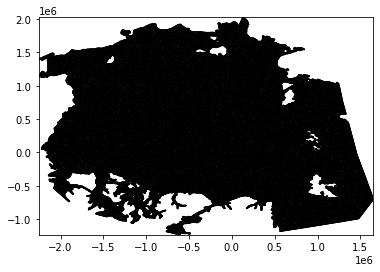

In [7]:
ax = plt.figure().add_subplot(111)
fig = ax.figure
ax.set_xlim([np.min([nodes1_x,nodes2_x,nodes3_x]),np.max([nodes1_x,nodes2_x,nodes3_x])])
ax.set_ylim([np.min([nodes1_y,nodes2_y,nodes3_y]),np.max([nodes1_y,nodes2_y,nodes3_y])])

pc = collections.PatchCollection(patch_list, cmap='binary', alpha=1)
pc.set_array(np.zeros(1))

pc.set_edgecolor('k')
ax.add_collection(pc)


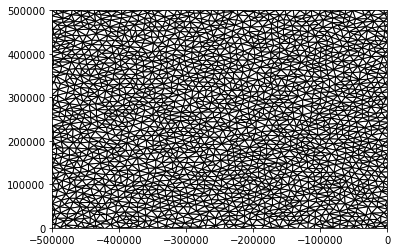

In [8]:
ax = plt.figure().add_subplot(111)
fig = ax.figure
ax.set_xlim([-0.5e6,0])
ax.set_ylim([0,0.5e6])

pc = collections.PatchCollection(patch_list, cmap='binary', alpha=1)
pc.set_array(np.zeros(1))

pc.set_edgecolor('k')
ax.add_collection(pc)


In [ ]:
xmin, xmax, ymin, ymax  = [-1e6,0,0,1e6]

ax = plt.figure().add_subplot(111)
fig = ax.figure
ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])

for t in np.arange(len(tag)):
        ccl   = []
        ccl.append((nodes1_x[t],nodes1_y[t]))
        ccl.append((nodes2_x[t],nodes2_y[t]))
        ccl.append((nodes3_x[t],nodes3_y[t]))
        ccl.append(ccl[0])
        patch_list.append(patches.Polygon(ccl,True,linewidth=0))

        pc = collections.PatchCollection(patch_list, cmap='binary', alpha=1)
        pc.set_array(np.zeros(1))
        pc.set_edgecolor(rgba_list[t])

ax.add_collection(pc)
